#### 1D 컨브넷
- Conv1D 층을 사용하여 구현. Conv2D와 인터페이스가 비슷함. (samples, time, features) 크기의 3D 텐서를 입력받고 비슷한 형태의 3D 텐서를 반환
- 합성곱 윈도우는 시간 축의 1D 윈도우이며 입력텐서의 두번째 축임  

In [1]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features=10000
max_len=500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
print(len(x_train),len(x_test))

17464789/17464789 [==============================] - 0s 0us/step
25000 25000


In [2]:
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)
print(x_train.shape, x_test.shape)

(25000, 500) (25000, 500)


In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [5]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 7ms/step - loss: 1.2569 - acc: 0.5034 - val_loss: 0.6919 - val_acc: 0.5148
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.6803 - acc: 0.5994 - val_loss: 0.6777 - val_acc: 0.6146
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.6487 - acc: 0.7193 - val_loss: 0.6476 - val_acc: 0.6862
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5906 - acc: 0.7833 - val_loss: 0.5706 - val_acc: 0.7670
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.4772 - acc: 0.8292 - val_loss: 0.4432 - val_acc: 0.8188
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3731 - acc: 0.8614 - val_loss: 0.4086 - val_acc: 0.8454
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3221 - acc: 0.8833 - val_loss: 0.4011 - val_acc: 0.8528
Epoch 8/10
157/157 [==============================] - 1s 6ms/step - loss: 0

검증 정확도는 LSTM(0.88) 보다 조금 낮지만 CPU, GPU에서 더 빠르게 실행됨. 이는 단어 수준의 감성분류 작업에 순환네트워크를 대신하여 빠르고 경제적인 1D 컨브넷을 사용할 수 있음을 보여줌

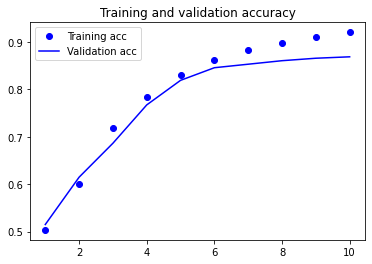

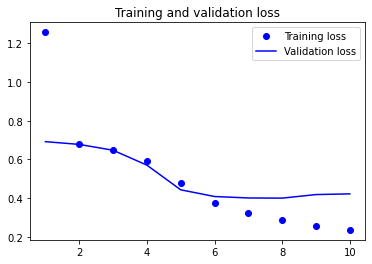

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()